# ESTIMATION OF FUTURE MERGING EVENTS

### Uploading files with last point and event type for each simulation 

In [1]:
import os
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fileinput_from_file (input_directory_file):
    
    input_directory_file = input_directory_file +".dat"

    df = pd.read_csv( input_directory_file , sep=",", header=0)
    print("OK! Uploaded file:",input_directory_file)
    return(df)  


In [3]:
data_phy_NSC = fileinput_from_file("NSC_N10000_ok_phy") 
data_nb_NSC = fileinput_from_file("NSC_N10000_ok_nb") 
data_phy_YSC = fileinput_from_file("YSC_N10000_ok_phy") 
data_nb_YSC = fileinput_from_file("YSC_N10000_ok_nb") 

OK! Uploaded file: NSC_N10000_ok_phy.dat
OK! Uploaded file: NSC_N10000_ok_nb.dat
OK! Uploaded file: YSC_N10000_ok_phy.dat
OK! Uploaded file: YSC_N10000_ok_nb.dat


In [4]:
# An examples
data_phy_NSC[data_phy_NSC.event == "merge"].head()

,m,x,y,z,vx,vy,vz,Eb,simulation,event
3483,9.785056e+31,2.452733e+16,6.729434e+16,-1.168997e+16,8313.260482,23745.785601,-3643.777589,-1.734532e+41,1161,merge
3484,2.181282e+31,-1.100277e+17,-3.018771e+17,5.244029e+16,-37292.625791,-106521.706886,16345.696659,-0.000000e+00,1161,merge
3485,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,1161,merge
4347,1.376237e+32,-2.462175e+16,3.417534e+15,1.431820e+16,-12398.936922,1076.400959,6289.572938,-0.000000e+00,1449,merge
4348,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,1449,merge


### Simple function to count the number of event

In [5]:
def count_events (dataframe):
    counts = np.array( [len(dataframe[dataframe.event == 'flyby']),
                        len(dataframe[dataframe.event == 'change13']),
                        len(dataframe[dataframe.event == 'change23']),
                        len(dataframe[dataframe.event == 'ionization']),
                        len(dataframe[dataframe.event == 'merge']),
                        len(dataframe[dataframe.event == 'Not_found']) ] )
    df=pd.DataFrame(counts/3, columns=["counts"], index = ["flyby","change13","change23","ionization","merge","Not_found"] ).T
    return(df)

In [6]:
N=10000

NSC_events_phy = count_events(data_phy_NSC)

NSC_events_nb = count_events(data_nb_NSC)

YSC_events_phy = count_events(data_phy_YSC)

YSC_events_nb = count_events(data_nb_YSC)

In [7]:
print("\n\t\tNUCLEAR STAR CLUSTER (NSC)")
NSC_events_phy


		NUCLEAR STAR CLUSTER (NSC)


,flyby,change13,change23,ionization,merge,Not_found
counts,7928.0,313.0,727.0,1009.0,22.0,1.0


In [8]:
print("\n\t\tYOUNG STAR CLUSTER (YSC)")
YSC_events_phy


		YOUNG STAR CLUSTER (YSC)


,flyby,change13,change23,ionization,merge,Not_found
counts,7617.0,443.0,1678.0,63.0,11.0,188.0


### Retrieving merge events

In [9]:
merge_N_df = data_nb_NSC[data_nb_NSC.event == 'merge']
merge_Y_df = data_nb_YSC[data_nb_YSC.event == 'merge']

merge_N_sim_num = np.unique(np.array(merge_N_df.simulation.values))
merge_Y_sim_num = np.unique(np.array(merge_Y_df.simulation.values))

print("Simulation number of merging event for NSC:\n", merge_N_sim_num, "\n\nNSC: Tot event:", np.count_nonzero(merge_N_sim_num))
print("\n\nSimulation number of merging event for YSC:\n", merge_Y_sim_num, "\n\nYSC: Tot event:", np.count_nonzero(merge_Y_sim_num))

Simulation number of merging event for NSC:
 [1161 1449 1878 2048 2252 2623 3037 3077 3212 3446 4297 5435 5480 5727
 6064 6389 6820 7198 8692 8764 9427 9492] 

NSC: Tot event: 22


Simulation number of merging event for YSC:
 [1758 2416 4789 5111 7412 7911 8430 8856 9208 9768 9926] 

YSC: Tot event: 11


# Computation of  $t_{GW}$

In [10]:
NSC_ae = fileinput_from_file("NSC_semi_major_axis_tail")
YSC_ae = fileinput_from_file("YSC_semi_major_axis_tail")

OK! Uploaded file: NSC_semi_major_axis_tail.dat
OK! Uploaded file: YSC_semi_major_axis_tail.dat


In [11]:
def calc_T_gw (m1,m2, a, e, sim, use_e=False):
    
    G_phy = 6.67408e-11                   # in m^3 * kg^-1 * s^-2
    G_nb = 1
    
    M_scale =  1.988e30             # in Kg (solar Mass --> 1.988 * 10^30 Kg)
    L_scale = 3.08567758130573e16    # in m (1 pc --> 3.08567758130573 * 10^16 m)
    T_scale = np.sqrt(L_scale**3 / (G_phy * M_scale))
    
    c = 2.998e+8 / (L_scale/T_scale)   # from [m/s] to [pc/yr] 
    
    
    if use_e==True:
        timeGW = (5/256)*  c**5 /G_nb**3 * ( (a**4) * (1-e**2)**(7/2) ) / (m1*m2*(m1+m2)) 
    else:
        timeGW = (5/256)*  c**5/G_nb**3 *  (a**4) / ( m1*m2*(m1+m2) )
    
    timeGW = timeGW * T_scale
    d = {'timeGW':timeGW, "simulation": sim}
    return(pd.DataFrame(d))

In [12]:
thres_yr= 13.8e9  # age of universe
sec_in_yr = 3.1536e7
thres_yr_s = thres_yr * sec_in_yr

In [13]:
def timeGW_and_plot (dataframe_nb, event_type, cluster_ae, bins_v=40, plot_comp_peter=False):

    # Only flybies event
    event_data_cluster = dataframe_nb[dataframe_nb.event == event_type ]

    #simulation's number of change 13
    sim_event= np.unique(event_data_cluster.simulation)

    dt_ae = cluster_ae[cluster_ae["simulation"].isin(sim_event)]

    if event_type == "flyby":
        first=0
        second=1
        name1="BH1"
        name2="BH2"
    elif event_type == "change13": 
        first=2
        second=1
        name1="BH3"
        name2="BH2"
    elif event_type == "change23": 
        first=2
        second=0
        name1="BH3"
        name2="BH1"
    
    bh1_N_m = event_data_cluster[first::3].m.values # 3rd BH ( exchange13) 
    bh2_N_m = event_data_cluster[second::3].m.values # 2nd BH
    a = dt_ae.A
    e = dt_ae.e

    #using Peters relation (NOT using eccentricity value)
    timeGW_event_apprx = calc_T_gw( bh1_N_m, bh2_N_m, a, e, sim_event, use_e = False)
    
    #using Peters relation (USING eccentricity value)
    timeGW_event       = calc_T_gw( bh1_N_m, bh2_N_m, a, e, sim_event, use_e = True)

    event_will_merge_apprx = timeGW_event_apprx [ timeGW_event_apprx.timeGW < thres_yr_s]
    event_will_merge       = timeGW_event       [ timeGW_event.timeGW       < thres_yr_s]


    m1_event_apprx = dataframe_nb.m[dataframe_nb["simulation"].isin(event_will_merge_apprx.simulation)][first::3]
    m2_event_apprx = dataframe_nb.m[dataframe_nb["simulation"].isin(event_will_merge_apprx.simulation)][second::3]
    m1_event = dataframe_nb.m[dataframe_nb["simulation"].isin(event_will_merge.simulation)][first::3]
    m2_event = dataframe_nb.m[dataframe_nb["simulation"].isin(event_will_merge.simulation)][second::3]

    dict_df = {"m1":m1_event.values,"m2":m2_event.values,"timeGW": event_will_merge.timeGW, "simulation":event_will_merge.simulation,"event":event_type}
    
    
    if plot_comp_peter==True:
    
        #number of binary that merge in a Hubble time (Peters relation with and without eccentricy contribution)
        fig, (ax0,ax1)= plt.subplots(1,2, figsize=(14,5))
        ax0.hist(event_will_merge_apprx["timeGW"]/(sec_in_yr*1e9), bins= 20, color='gold')#label="Merging in a Hubble-time")
        ax0.set_title("{} events: merging in a Hubble time".format(event_type.upper()) )
        ax0.set_xlabel("Time [Gyr]")
        ax0.set_ylabel("Frequency")
        ax0.text(0.6,0.8, "# event: {} \n# total {}: {}"
                 .format(len(event_will_merge_apprx), event_type, len(sim_event)),
                transform=ax0.transAxes,fontsize= 12)
        ax0.text(0.65,0.6, r"$t_{GW} \sim a^4 $",
                  transform=ax0.transAxes, fontsize= 14,bbox=dict(facecolor='gold', alpha=0.2))
        #ax0.legend(fontsize= 12)

        ax1.hist(event_will_merge["timeGW"]/(sec_in_yr*1e9), bins=20,color= 'brown')# label="Merging in a Hubble-time")
        ax1.set_title("{} events: merging in a Hubble time".format(event_type.upper()) )
        ax1.set_xlabel("Time [Gyr]")
        ax1.set_ylabel("Frequency")
        ax1.text(0.6,0.8, "# event: {} \n# total {}: {}"
                 .format(len(event_will_merge), event_type, len(sim_event)),
                  transform=ax1.transAxes, fontsize= 12)
        ax1.text(0.6,0.6, r"$t_{GW} \sim a^4 (1-e^2)^{7/2}$",
                  transform=ax1.transAxes, fontsize= 14, bbox=dict(facecolor='brown', alpha=0.2))
        #ax1.legend( fontsize= 12)
        plt.show()

        #distribution mass of binaries that merge in a Hubble time (Peters relation with and without eccentricy contribution)
        fig, (ax2,ax3)= plt.subplots(1,2, figsize=(14,5))

        bins_apprx = np.linspace(0, max(np.fmax(m1_event_apprx,m2_event_apprx)) , bins_v)
        bins = np.linspace(0, max(np.fmax(m1_event,m2_event)) , bins_v)

        ax2.hist(m1_event_apprx, bins_apprx, alpha=0.5, label='{} mass'.format(name1))
        ax2.hist(m2_event_apprx, bins_apprx, alpha=0.5, label='{} mass'.format(name2))
        ax2.set_title("Mass distribution of binaries that\n will merge in a Hubble Time ")
        ax2.set_xlabel("Solar Masses")
        ax2.set_ylabel("Frequency")
        ax2.legend(loc='upper right')

        ax3.hist(m1_event, bins, alpha=0.5, label='BH1 mass')
        ax3.hist(m2_event, bins, alpha=0.5, label='BH2 mass')
        ax3.set_title("Mass distribution of binaries that\n will merge in a Hubble Time ")
        ax3.set_xlabel("Solar Masses")
        ax3.set_ylabel("Frequency")
        ax3.legend(loc='upper right')
        plt.show()
    
    else:
        return(pd.DataFrame(dict_df))

In [15]:
ch13_NSC = timeGW_and_plot (data_nb_NSC, event_type='change13', cluster_ae=NSC_ae)
ch23_NSC = timeGW_and_plot (data_nb_NSC, event_type='change23', cluster_ae=NSC_ae)
ch13_YSC = timeGW_and_plot (data_nb_YSC, event_type='change13', cluster_ae=YSC_ae)
ch23_YSC = timeGW_and_plot (data_nb_YSC, event_type='change23', cluster_ae=YSC_ae)


fly_NSC  = timeGW_and_plot (data_nb_NSC, event_type='flyby',    cluster_ae=NSC_ae)
ch_NSC = pd.concat([ch13_NSC,ch23_NSC],axis=0)

fly_YSC  = timeGW_and_plot (data_nb_YSC, event_type='flyby',    cluster_ae=YSC_ae)
ch_YSC = pd.concat([ch13_YSC,ch23_YSC],axis=0)

In [16]:
fly_NSC

,m1,m2,timeGW,simulation,event
18,37.653836,12.702558,1.699311e+14,18,flyby
67,35.395082,29.910703,1.380782e+17,67,flyby
68,55.040673,15.623871,3.251888e+17,68,flyby
79,29.884712,7.414262,2.747668e+17,79,flyby
81,39.094780,23.603472,1.624374e+17,81,flyby
...,...,...,...,...,...
9938,69.801697,18.328096,2.566582e+17,9938,flyby
9965,49.795542,42.267025,2.844356e+14,9965,flyby
9985,42.971971,27.530201,2.795817e+17,9985,flyby
9986,27.641320,24.694067,1.046043e+17,9986,flyby


# YSC - NSC: analysis $t_{GW}$

#### Example of different computation of $t_{GW}$, with and without the eccentricity $e$ for NSC


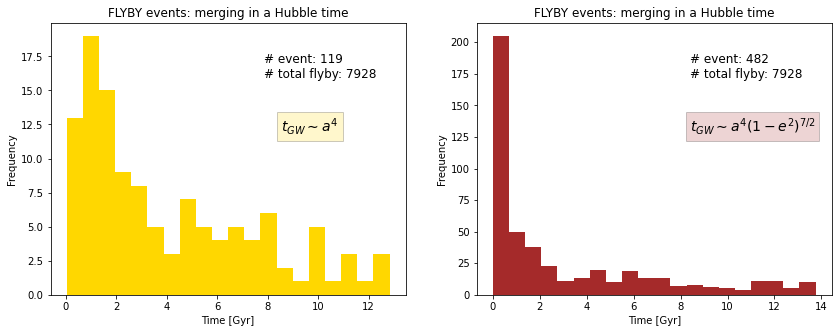

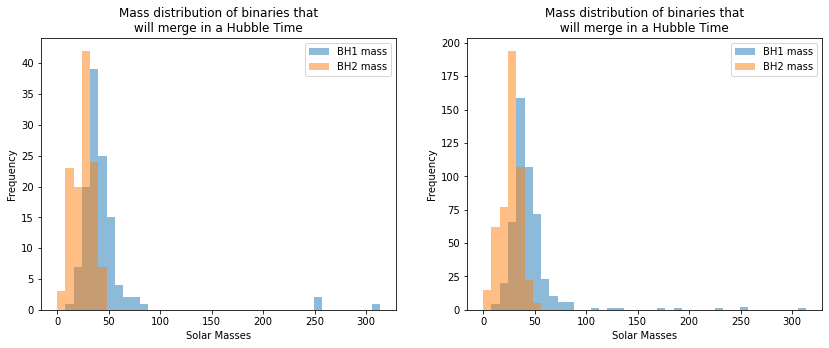

In [17]:
# For flybies, plot the difference of approximating t_GW, not considering the eccentricity
timeGW_and_plot (data_nb_NSC, event_type='flyby', cluster_ae=NSC_ae,plot_comp_peter=True)
#timeGW_and_plot (data_nb_YSC, event_type='flyby', cluster_ae=YSC_ae,plot_comp_peter=True)

#timeGW_and_plot (data_nb_NSC, event_type='change13', cluster_ae=NSC_ae,plot_comp_peter=True)
#timeGW_and_plot (data_nb_NSC, event_type='change23', cluster_ae=NSC_ae,plot_comp_peter=True)

In [18]:
def plot_tgw (df_NSC,df_YSC,event, bins, col1,col2):
        
        #number of binary that merge in a Hubble time (Peters relation with and without eccentricy contribution)
        fig, (ax1,ax0)= plt.subplots(1,2, figsize=(10,5))
        #fig.suptitle("{}".format(event.upper()), fontsize=20)
        
        ax0.hist(df_NSC["timeGW"]/(sec_in_yr*1e9), bins= bins, color=col1, ec = "k", histtype = "step", fill = True)#label="Merging in a Hubble-time")
        #ax0.set_title("{} events: merging in a Hubble time".format(event.upper()) )
        ax0.set_xlabel("Time [Gyr]", size = 14)
        #ax0.set_ylabel("Frequency", size = 14)
        if event =='flyby':  tmp = len(data_nb_NSC[data_nb_NSC.event == 'flyby'])
        else: tmp = len(data_nb_NSC[data_nb_NSC.event.isin(np.unique('change13')) | data_nb_NSC.event.isin(np.unique('change23'))])
        ax0.text(0.30,0.8, "NSC:\n#event: {} \n# total {}: {}"
                 .format(len(df_NSC), event, tmp), transform=ax0.transAxes,fontsize= 14)
        ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
        ax0.text(0.30,0.6, r"$t_{GW} \sim a^4 (1-e^2)^{7/2}$",
                  transform=ax0.transAxes, fontsize= 12,bbox=dict(facecolor=col1, alpha=0.2))
        ax0.tick_params(axis = "x", labelsize = 14)
        ax0.tick_params(axis = "y", labelsize = 14)
        #ax0.legend(fontsize= 12)

        ax1.hist(df_YSC["timeGW"]/(sec_in_yr*1e9), bins=bins,color= col2, ec = "k", histtype = "step", fill = True)# label="Merging in a Hubble-time")
        #ax1.set_title("{} events: merging in a Hubble time".format(event.upper()) )
        ax1.set_xlabel("Time [Gyr]", size = 14)
        ax1.set_ylabel("Frequency", size = 14)
        if event =='flyby':  tmp = len(data_nb_YSC[data_nb_YSC.event == 'flyby'])
        else: tmp = len(data_nb_YSC[data_nb_YSC.event.isin(np.unique('change13')) | data_nb_YSC.event.isin(np.unique('change23'))])
        ax1.text(0.30,0.8, "YSC:\n# event: {} \n# total {}: {}"
                 .format(len(df_YSC), event,tmp),transform=ax1.transAxes, fontsize= 14)
        ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
        ax1.text(0.30,0.6, r"$t_{GW} \sim a^4 (1-e^2)^{7/2}$",
                  transform=ax1.transAxes, fontsize= 12, bbox=dict(facecolor=col2, alpha=0.2))
        ax1.tick_params(axis = "x", labelsize = 14)
        ax1.tick_params(axis = "y", labelsize = 14)
        #ax1.legend( fontsize= 12)
        plt.show()
        return fig

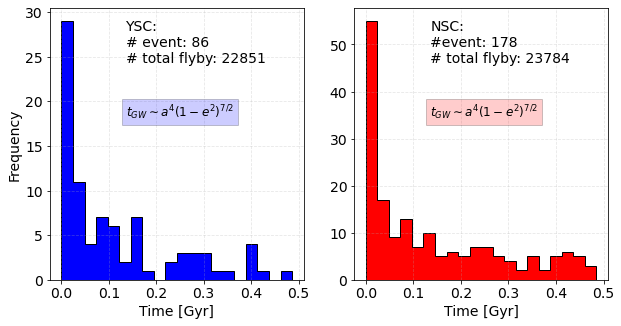

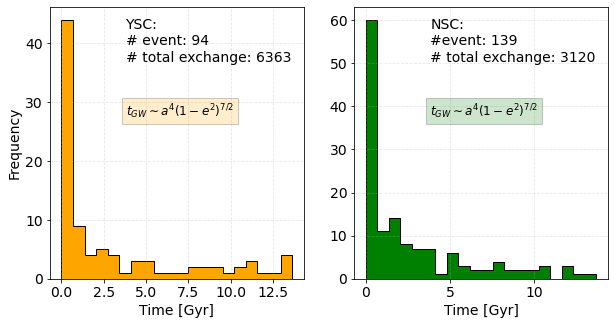

In [24]:
a = plot_tgw(fly_NSC[fly_NSC.timeGW < sec_in_yr*1e9/2],fly_YSC[fly_YSC.timeGW < sec_in_yr*1e9/2],'flyby',20,col1='red',col2='blue')
b = plot_tgw(ch_NSC,ch_YSC,'exchange',20,col1='green',col2='orange')

#a.savefig("fut_merge_fl.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
#b.savefig("fut_merge_ex.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plot_tgw(ch13_NSC,ch13_YSC,'change13',40,col1='green',col2='orange')
#plot_tgw(ch23_NSC,ch23_YSC,'change23',40,col1='violet',col2='gray'

In [48]:
def plot_mass (df_NSC,df_YSC, event, bins_v, col1,col2):
        
        label_name1 = "BH1"
        label_name2 = "BH2"
        
        if event != "flyby":
            label_name1 = "BH intruder"
            label_name2 = "BH original"
        
        #number of binary that merge in a Hubble time (Peters relation with and without eccentricy contribution)
        fig, (ax2,ax3)= plt.subplots(1,2, figsize=(14,5))
        fig.suptitle("{}".format(event.upper()), fontsize=20)
        
        bins = np.linspace(0, max(np.fmax(df_NSC.m1,df_NSC.m2)) , bins_v)
        
        ax2.hist(df_NSC["m1"], bins= bins, alpha=0.5, color=col1, label=label_name1)
        ax2.hist(df_NSC["m2"], bins= bins, alpha=0.5, label=label_name2)

        ax2.set_title("{} events: Mass distribution of binaries".format(event.upper()) )
        ax2.set_xlabel(r"Solar Masses [$ \sim 2 \cdot 10^{30} \, Kg$]")
        ax2.set_ylabel("Frequency")
        ax2.text(0.8,0.5, " NSC ", transform=ax2.transAxes, fontsize=15,bbox=dict(alpha=0.2))
        ax2.legend(fontsize= 12, loc='upper right')

        bins = np.linspace(0, max(np.fmax(df_YSC.m1,df_YSC.m2)) , bins_v)
        
        ax3.hist(df_YSC["m1"], bins= bins, alpha=0.5, color=col2, label=label_name1)
        ax3.hist(df_YSC["m2"], bins= bins, alpha=0.5, label=label_name2)

        ax3.set_title("{} events: Mass distribution of binaries".format(event.upper()) )
        ax3.set_xlabel("Solar Masses [$ \sim 2 \cdot 10^{30} \, Kg$]")
        ax3.set_ylabel("Frequency")
        ax3.text(0.8,0.5, " YSC ", transform=ax3.transAxes, fontsize=15,bbox=dict(alpha=0.2))
        ax3.legend(fontsize= 12, loc='upper right')

        plt.show()

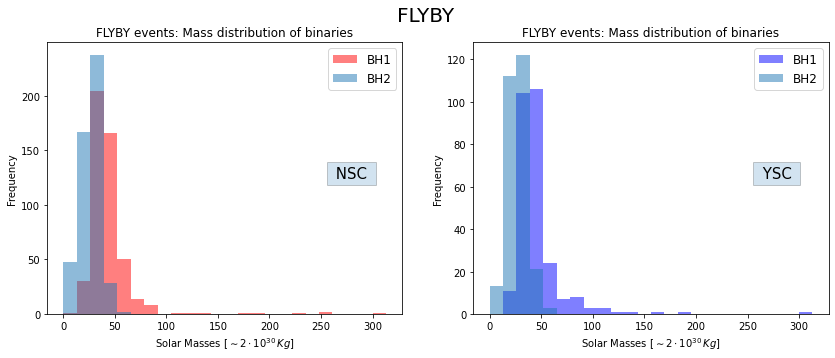

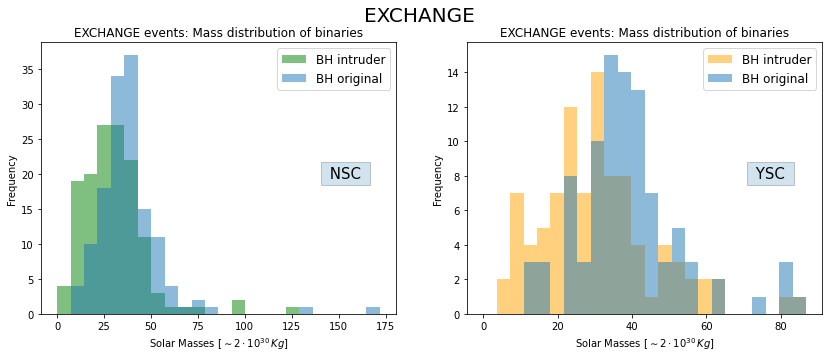

In [49]:
plot_mass (fly_NSC,fly_YSC,'flyby',25, col1='red',col2='blue')
plot_mass(ch_NSC,ch_YSC,'exchange',25, col1='green',col2='orange')

In [20]:
print("\nSUMMARY: event that will merge in a hubble time\n\n")

print("NSC:")
print("\tFLYBIES:   Event will merge in Hubble time:\t",len(fly_NSC),"\t(",len(data_nb_NSC[data_nb_NSC.event=='flyby']), "total flybies)")
print("\tCHANGE:    Event will merge in Hubble time:\t",len(ch_NSC),"\t(",(len(data_nb_NSC[data_nb_NSC.event=='change13'])+
                                                                             len(data_nb_NSC[data_nb_NSC.event=='change23'])), "total changes)" )

#print("\n\tCHANGE 1-3: Event will merge in Hubble time:  ",len(ch13_NSC),"\t(",(len(data_nb_NSC[data_nb_NSC.event=='change13'])), "total changes13)" )
#print("\tCHANGE 2-3: Event will merge in Hubble time:  ",len(ch23_NSC),"\t(",(len(data_nb_NSC[data_nb_NSC.event=='change23'])), "total changes23)" )
print("\nYSC:")
print("\tFLYBIES:    Event will merge in Hubble time:\t",len(fly_YSC),"\t(",len(data_nb_YSC[data_nb_YSC.event=='flyby']), "total flybies)")
print("\tCHANGE:     Event will merge in Hubble time:\t",len(ch_YSC),"\t(",(len(data_nb_YSC[data_nb_YSC.event=='change13'])+
                                                                             len(data_nb_YSC[data_nb_YSC.event=='change23'])), "total changes)" )
#print("\n\tCHANGE 1-3: Event will merge in Hubble time:  ",len(ch13_YSC),"\t(",(len(data_nb_YSC[data_nb_YSC.event=='change13'])), "total changes13)" )
#print("\tCHANGE 2-3: Event will merge in Hubble time:  ",len(ch23_YSC),"\t(",(len(data_nb_YSC[data_nb_YSC.event=='change23'])), "total changes23)" )


SUMMARY: event that will merge in a hubble time


NSC:
	FLYBIES:   Event will merge in Hubble time:	 482 	( 23784 total flybies)
	CHANGE:    Event will merge in Hubble time:	 139 	( 3120 total changes)

YSC:
	FLYBIES:    Event will merge in Hubble time:	 271 	( 22851 total flybies)
	CHANGE:     Event will merge in Hubble time:	 94 	( 6363 total changes)
